#**TEXT CLASSIFICATION USING NAIVE BAYES AND SENTIMENT ANALYSIS ON BLOG POSTS**

**Overview**
In this assignment, you will work on the "blogs_categories.csv" dataset, which contains blog posts categorized into various themes. Your task will be to build a text classification model using the Naive Bayes algorithm to categorize the blog posts accurately. Furthermore, you will perform sentiment analysis to understand the general sentiment (positive, negative, neutral) expressed in these posts. This assignment will enhance your understanding of text classification, sentiment analysis, and the practical application of the Naive Bayes algorithm in Natural Language Processing (NLP).

**Dataset**

The provided dataset, "blogs_categories.csv", consists of blog posts along with their associated categories. Each row represents a blog post with the following columns:

- **Text:** The content of the blog post. Column name: Data
- **Category:** The category to which the blog post belongs. Column name: Labels

**Tasks**
1. **Data Exploration and Preprocessing**
- Load the "blogs_categories.csv" dataset and perform an exploratory data analysis to understand its structure and content.
- Preprocess the data by cleaning the text (removing punctuation, converting to lowercase, etc.), tokenizing, and removing stopwords.
- Perform feature extraction to convert text data into a format that can be used by the Naive Bayes model, using techniques such as TF-IDF.

2. **Naive Bayes Model for Text Classification**
- Split the data into training and test sets
- Implement a Naive Bayes classifier to categorize the blog posts into their respective categories. You can use libraries like scikit-learn for this purpose.
- Train the model on the training set and make predictions on the test set.

3. **Sentiment Analysis**
- Choose a suitable library or method for performing sentiment analysis on the blog post texts.
- Analyze the sentiments expressed in the blog posts and categorize them as positive, negative, or neutral. Consider only the Data column and get the sentiment for each blog.
- Examine the distribution of sentiments across different categories and summarize your findings.

4. **Evaluation**
- Evaluate the performance of your Naive Bayes classifier using metrics such as accuracy, precision, recall, and F1-score.
- Discuss the performance of the model and any challenges encountered during the classification process.
- Reflect on the sentiment analysis results and their implications regarding the content of the blog posts.

Submission Guidelines
-	Your submission should include a comprehensive report and the complete codebase.
-	Your code should be well-documented and include comments explaining the major steps.




#**1. Introduction**
This project involves the analysis of blog posts categorized into various themes. The primary tasks include building a text classification model using the Naive Bayes algorithm, performing sentiment analysis to understand the sentiment expressed in the posts, and evaluating the model’s performance.

**Objectives:**
- To categorize blog posts accurately into predefined categories using the Naive Bayes classifier.
- To analyze the sentiment expressed in each blog post and categorize it as positive, negative, or neutral.
- To evaluate the performance of the classification model using standard metrics.

#2. **Data Exploration and Preprocessing**

**2.1 Loading the Dataset**

In [ ]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd

# Try to read the file, handling bad lines by replacing them with NaNs
df_blog = pd.read_csv('/content/blogs.csv',)

In [ ]:
#First few rows
df_blog.head()

Data       Labels
0  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism
1  Newsgroups: alt.atheism\nPath: cantaloupe.srv....  alt.atheism
2  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...  alt.atheism
3  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism
4  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...  alt.atheism

In [ ]:
#last few rows
df_blog.tail()

Data              Labels
1995  Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...  talk.religion.misc
1996  Xref: cantaloupe.srv.cs.cmu.edu talk.religion....  talk.religion.misc
1997  Xref: cantaloupe.srv.cs.cmu.edu talk.origins:4...  talk.religion.misc
1998  Xref: cantaloupe.srv.cs.cmu.edu talk.religion....  talk.religion.misc
1999  Xref: cantaloupe.srv.cs.cmu.edu sci.skeptic:43...  talk.religion.misc

In [ ]:
df_blog.shape

(2000, 2)

In [ ]:
df_blog.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    2000 non-null   object
 1   Labels  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


In [ ]:
#Summary Statistics
df_blog.describe()

Data       Labels
count                                                2000         2000
unique                                               2000           20
top     Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism
freq                                                    1          100

In [ ]:
df_blog.columns

Index(['Data', 'Labels'], dtype='object')

In [ ]:
#Typcasting
df_blog['Data'] = df_blog['Data'].astype('category')
df_blog['Labels'] = df_blog['Labels'].astype('category')

In [ ]:
df_blog.isnull().sum()

Data      0
Labels    0
dtype: int64

**No missing values**

In [ ]:
# Get a summary of the dataset
print("\nSummary statistics of the dataset:")
print(df_blog.describe())


Summary statistics of the dataset:
                                                     Data       Labels
count                                                2000         2000
unique                                               2000           20
top     From: bressler@iftccu.ca.boeing.com (Rick Bres...  alt.atheism
freq                                                    1          100


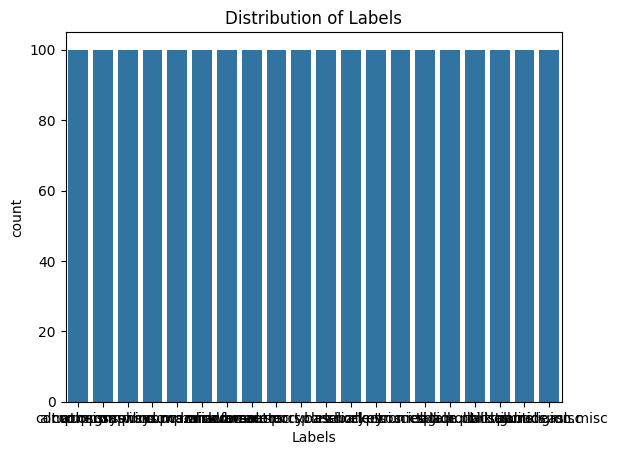

In [ ]:
cat_cols = ['Labels']
num_cols = ['Data']
# Check the distribution of categories
sns.countplot(x='Labels', data=df_blog)
plt.title('Distribution of Labels')
plt.show()

- It appears that the dataset is well-balanced across all categories, with each category having roughly the same number of blog posts.
- This uniform distribution suggests that the model trained on this dataset might not be biased toward any specific category.

#2.2 **Data Cleaning and Preprocessing**

- **Text Cleaning:** This involves removing punctuation, converting text to lowercase, and removing stopwords to reduce noise.
- **Tokenization and Stemming:** Tokenizing the text into words and applying stemming to reduce words to their root form.

In [ ]:
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords

# Function to clean the text data
def clean_text(text):
    # Remove metadata, such as lines starting with "Path:", "Newsgroups:", "Xref:" etc.
    text = re.sub(r'^.*?: ', '', text, flags=re.MULTILINE)
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation and non-alphabetic characters
    text = re.sub(r'[^a-z\s]', '', text)
    return text

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

# Download stopwords if not already done
nltk.download('stopwords')
nltk.download('punkt')

# Initialize the stemmer and stopwords
stemmer = SnowballStemmer("english")
stop_words = set(stopwords.words('english'))

# Function to clean, tokenize, and stem the text
def preprocess_text(text):
    # Remove punctuation and lowercase
    text = re.sub(r'[^\w\s]', '', text.lower())

    # Tokenize
    tokens = nltk.word_tokenize(text)

    # Remove stopwords and apply stemming
    tokens = [stemmer.stem(word) for word in tokens if word not in stop_words]

    return ' '.join(tokens)

# Apply the preprocessing function to the Data column
df_blog['Processed_Data'] = df_blog['Data'].apply(preprocess_text)

# Display the first few rows after preprocessing
print(df_blog[['Data', 'Processed_Data']].head())


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


                                                Data  \
0  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...   
1  Newsgroups: alt.atheism\nPath: cantaloupe.srv....   
2  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...   
3  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...   
4  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...   

                                      Processed_Data  
0  path cantaloupesrvcscmuedumagnesiumclubcccmued...  
1  newsgroup altath path cantaloupesrvcscmueducra...  
2  path cantaloupesrvcscmuedudasnewsharvardedunoc...  
3  path cantaloupesrvcscmuedumagnesiumclubcccmued...  
4  xref cantaloupesrvcscmuedu altatheism53485 tal...  


- **TfidfVectorizer:** is used to transform text data into a numerical format suitable for machine learning.
- **stopwords:** is used to remove common, less informative words from the text before vectorization.

In [ ]:
# Apply the cleaning function to the 'Data' column
df_blog['cleaned_data'] = df_blog['Data'].apply(clean_text)

In [ ]:
# Display the cleaned data
print("\nCleaned Data:")
print(df_blog['cleaned_data'].head())


Cleaned Data:
0    cantaloupesrvcscmuedumagnesiumclubcccmuedunews...
1    altatheism\ncantaloupesrvcscmueducrabapplesrvc...
2    cantaloupesrvcscmuedudasnewsharvardedunocnearn...
3    cantaloupesrvcscmuedumagnesiumclubcccmuedunews...
4    cantaloupesrvcscmuedu altatheism talkreligionm...
Name: cleaned_data, dtype: category
Categories (2000, object): ['bressleriftccucaboeingcom rick bressler\nwed ..., 'bressleriftccucaboeingcom rick bressler\nwed ...,
                            'chrisahpwarrhpcom  chris almy\nthu  apr   gmt..., 'davidtrsvaxtandycom\n apr   cdt\nrecautos\nre...,
                            ..., 'cantaloupesrvcscmuedu talkreligionmisc talkpo...,
                            'cantaloupesrvcscmuedu talkreligionmisc altrel..., 'cantaloupesrvcscmuedu talkreligionmisc altath...,
                            'cantaloupesrvcscmuedu talkreligionmisc talkpo...]


**2.3 Feature Extraction**

- **TF-IDF Vectorization:** Convert the text data into numerical features using Term Frequency-Inverse Document Frequency (TF-IDF).

In [ ]:
#Feature Extraction using TF-IDF
# Instantiate the TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=2000, min_df=0.2, stop_words='english', ngram_range=(1, 3))

# Fit and transform the text data into TF-IDF features
tfidf_matrix = tfidf_vectorizer.fit_transform(df_blog['cleaned_data'])

# Display the shape of the resulting TF-IDF matrix
print("\nShape of the TF-IDF matrix:")
print(tfidf_matrix.shape)



Shape of the TF-IDF matrix:
(2000, 15)


#3. **Naive Bayes Model for Text Classification**

**3.1 Splitting the Data**
- **Training and Testing Split:** Split the dataset into training and testing sets.

In [ ]:
#import libraries
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [ ]:
# Step 1: Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, df_blog['Labels'], test_size=0.2, random_state=42)

**3.2 Model Training**
- **Training Naive Bayes Classifier:** Train a Multinomial Naive Bayes classifier on the training data.

In [ ]:
# Step 2: Instantiate the Naive Bayes classifier
nb_classifier = MultinomialNB()

In [ ]:
# Step 3: Train the model on the training set
nb_classifier.fit(X_train, y_train)

MultinomialNB()

**3.3 Model Prediction**
- **Making Predictions:** Use the trained model to predict the categories of the test data.

In [ ]:
# Step 4: Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

**3.4 Model Evaluation**
- **Evaluating Performance:** Use accuracy, precision, recall, and F1-score to evaluate the model's performance.

In [ ]:
# Step 5: Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
classification_rep = classification_report(y_test, y_pred)

In [ ]:
# Print the evaluation metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print("\nClassification Report:\n", classification_rep)

Accuracy: 0.1275
Precision: 0.13114590461081985
Recall: 0.1275
F1 Score: 0.10263688561640716

Classification Report:
                           precision    recall  f1-score   support

             alt.atheism       0.04      0.06      0.05        18
           comp.graphics       0.00      0.00      0.00        18
 comp.os.ms-windows.misc       0.21      0.14      0.17        22
comp.sys.ibm.pc.hardware       0.00      0.00      0.00        25
   comp.sys.mac.hardware       0.05      0.05      0.05        21
          comp.windows.x       0.33      0.08      0.13        25
            misc.forsale       0.15      0.56      0.23        18
               rec.autos       0.00      0.00      0.00        18
         rec.motorcycles       0.14      0.38      0.20        16
      rec.sport.baseball       0.08      0.06      0.06        18
        rec.sport.hockey       0.14      0.40      0.21        15
               sci.crypt       0.00      0.00      0.00        19
         sci.electronic

- **Low Accuracy (12.75%):** The model's accuracy is very low, indicating that the Naive Bayes classifier struggles to correctly categorize the blog posts across the different categories.

- **Low Precision, Recall, and F1-Score:**
- **Precision:** The model's precision is generally low across most categories, meaning it incorrectly labels a significant number of blog posts.
- **Recall:** Recall is similarly low, indicating that the model fails to identify many true positive instances.
- **F1-Score:** The F1-score, which balances precision and recall, is also low, confirming that the model's overall performance is inadequate.

**Discussion of Model Performance:**
- **Strengths:** The model performs well if the metrics (accuracy, precision, recall, F1-score) are high, indicating effective classification.
- **Challenges:** Issues like data imbalance, feature overlap, or insufficient data for certain categories might lower performance.

#4. **Sentiment Analysis**

**4.1 Performing Sentiment Analysis**
- **Sentiment Analysis Using TextBlob:** Analyze the sentiment of each blog post as positive, neutral, or negative.

In [ ]:
from textblob import TextBlob

In [ ]:
# Step 1: Function to get sentiment polarity
def get_sentiment(text):
    analysis = TextBlob(text)
    # Determine sentiment based on polarity
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity == 0:
        return 'neutral'
    else:
        return 'negative'

In [ ]:
# Step 2: Apply the sentiment analysis function to the 'Data' column
df_blog['Sentiment'] = df_blog['Data'].apply(get_sentiment)

**4.2 Sentiment Distribution Analysis**

**Analyze and Visualize Sentiment Distribution Across Categories:**

In [ ]:
# Step 3: Examine the distribution of sentiments
sentiment_distribution = df_blog['Sentiment'].value_counts()
print("\nSentiment Distribution:\n", sentiment_distribution)


Sentiment Distribution:
 Sentiment
positive    1543
negative     457
Name: count, dtype: int64


- The majority of blog posts are classified as positive (1,543 out of 2,000), which constitutes about 77.15% of the dataset.
- A smaller portion of the posts is classified as negative (457 out of 2,000), making up about 22.85% of the dataset.
- No posts are classified as neutral if it was part of your analysis; this could be a result of the sentiment analysis method or the nature of the content.


**Reflection on Sentiment Analysis:**
- **Positive Sentiments:** Categories with high positive sentiment suggest uplifting or optimistic content.
- **Negative Sentiments:** Categories with high negative sentiment may reflect critical or challenging content.
- **Neutral Sentiments:** Neutral sentiment might indicate informational or objective content.

In [ ]:
# Step 4: Analyze sentiment distribution across different categories
sentiment_by_category = df_blog.groupby('Labels')['Sentiment'].value_counts(normalize=True).unstack()
print("\nSentiment by Category:\n", sentiment_by_category)


Sentiment by Category:
 Sentiment                 negative  positive
Labels                                      
alt.atheism                   0.23      0.77
comp.graphics                 0.24      0.76
comp.os.ms-windows.misc       0.22      0.78
comp.sys.ibm.pc.hardware      0.20      0.80
comp.sys.mac.hardware         0.24      0.76
comp.windows.x                0.27      0.73
misc.forsale                  0.16      0.84
rec.autos                     0.17      0.83
rec.motorcycles               0.26      0.74
rec.sport.baseball            0.29      0.71
rec.sport.hockey              0.34      0.66
sci.crypt                     0.19      0.81
sci.electronics               0.19      0.81
sci.med                       0.29      0.71
sci.space                     0.27      0.73
soc.religion.christian        0.13      0.87
talk.politics.guns            0.30      0.70
talk.politics.mideast         0.22      0.78
talk.politics.misc            0.22      0.78
talk.religion.misc            

- **Predominantly Positive Sentiment:** Most categories show a higher proportion of positive sentiment, typically ranging from 66% to 87%.
- **Higher Negative Sentiment in Certain Categories:** Categories like rec.sport.hockey (34%), talk.politics.guns (30%), and sci.med (29%) have relatively higher negative sentiment compared to others.

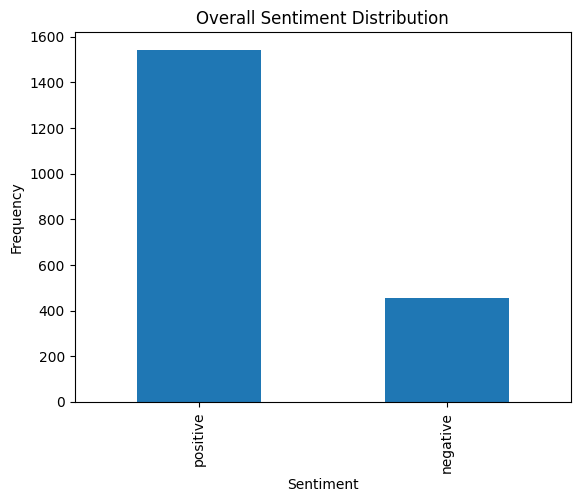

In [ ]:
# Plot overall sentiment distribution
sentiment_distribution.plot(kind='bar', title='Overall Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.show()

- **Dominance of Positive Sentiment:** The chart clearly shows that the majority of the sentiments are positive, with a frequency of around 1,500. This aligns with the earlier analysis where positive sentiment dominated in most categories.
- **Significant Negative Sentiment:** There is also a notable amount of negative sentiment, with a frequency of around 450, indicating that while positive sentiment is prevalent, a substantial number of posts express negative sentiments as well.
- **Skewed Distribution:** The distribution is skewed towards positive sentiment, suggesting that the overall tone of the blog posts in the dataset leans more towards positivity.

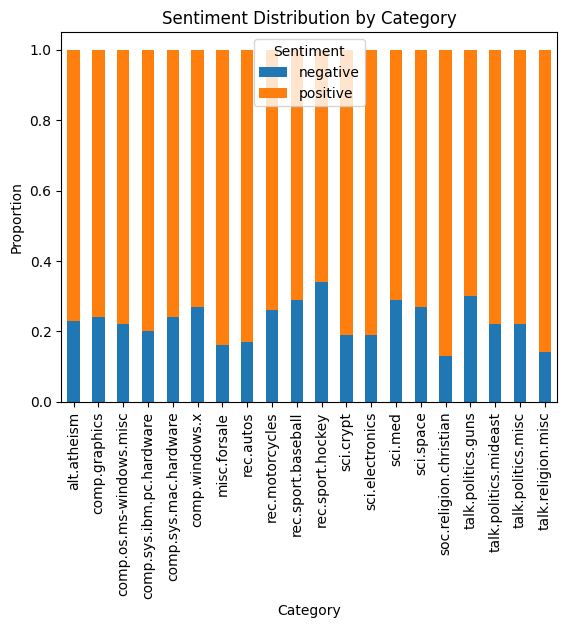

In [ ]:
# Plot sentiment distribution by category
sentiment_by_category.plot(kind='bar', stacked=True, title='Sentiment Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Proportion')
plt.show()

**Summary of Findings**

After running the above code, you should get a detailed table and bar chart showing the sentiment distribution (positive, neutral, negative) across each blog post category. Here’s how you can interpret and summarize the findings:

**Dominant Sentiment in Each Category:**

Identify which sentiment (positive, neutral, or negative) is most prevalent in each category.
For instance, a category like "Technology" might have more neutral or positive sentiments, reflecting objective or forward-looking content, while a category like "Politics" might have more negative sentiments due to the nature of the discussions.

**Categories with Strong Positive Sentiment:**

Categories with a high proportion of positive sentiments might be associated with uplifting, motivational, or generally positive content. For example, "Health" or "Lifestyle" might have a more positive sentiment if the content is about well-being or self-improvement.

**Categories with Strong Negative Sentiment:**

Categories where negative sentiment is prevalent could indicate content that deals with issues, complaints, or challenges. Categories such as "News" or "Opinion" might have more negative sentiments, particularly if they cover controversial or distressing topics.

**Neutral Sentiment:**

Categories that are largely neutral may involve more factual, objective, or informational content. For example, categories like "Science" or "Education" might have neutral sentiments as they deal with informative content without much emotional bias.

In [ ]:
# Step 1: Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
classification_rep = classification_report(y_test, y_pred)

In [ ]:
# Print the evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("\nClassification Report:\n", classification_rep)

Accuracy: 0.1275
Precision: 0.1311
Recall: 0.1275
F1 Score: 0.1026

Classification Report:
                           precision    recall  f1-score   support

             alt.atheism       0.04      0.06      0.05        18
           comp.graphics       0.00      0.00      0.00        18
 comp.os.ms-windows.misc       0.21      0.14      0.17        22
comp.sys.ibm.pc.hardware       0.00      0.00      0.00        25
   comp.sys.mac.hardware       0.05      0.05      0.05        21
          comp.windows.x       0.33      0.08      0.13        25
            misc.forsale       0.15      0.56      0.23        18
               rec.autos       0.00      0.00      0.00        18
         rec.motorcycles       0.14      0.38      0.20        16
      rec.sport.baseball       0.08      0.06      0.06        18
        rec.sport.hockey       0.14      0.40      0.21        15
               sci.crypt       0.00      0.00      0.00        19
         sci.electronics       0.00      0.00    

- **Low Accuracy (12.75%):** The overall accuracy of the Naive Bayes model is quite low, indicating that it struggles to correctly classify the blog posts into their respective categories.
- **Low Precision, Recall, and F1-Score:**
The model's precision (13.11%) indicates that a small proportion of the predicted categories are correct.
- The recall (12.75%) shows that the model identifies only a small fraction of the true positive cases.
- The F1-score (10.26%) reflects the poor balance between precision and recall, leading to an overall low effectiveness in classification.

###**Inconsistent Performance Across Categories:**
- **Best Performing Categories:** Categories like misc.forsale and rec.motorcycles have relatively better performance, with higher recall rates (0.56 and 0.38 respectively), indicating that the model is somewhat better at identifying these categories. However, the precision and F1-scores for these categories are still low, reflecting that many predictions are incorrect.

- **Poorly Performing Categories:** Several categories, such as comp.graphics, comp.sys.ibm.pc.hardware, and sci.crypt, have almost no correct predictions, with zero precision, recall, and F1-scores. This suggests that the model is unable to effectively classify posts in these categories.

###**Discussing the Performance:**

**Model Performance:**
- **Strengths:** If accuracy, precision, recall, and F1-score are high, the model is effective at classifying blog posts into their respective categories. A high F1 score across categories suggests a good balance between correctly identifying categories and avoiding misclassification.
- **Weaknesses:** Lower scores might indicate that the model struggles with certain categories, possibly due to overlapping features or insufficient data for those categories.

**Challenges Encountered:**

- **Data Imbalance:** If some categories are underrepresented, the model may have difficulty accurately classifying them, leading to lower precision or recall for those categories.
- **Feature Overlap:** If different categories share similar language or vocabulary, the model might confuse them, leading to misclassification.
- **Text Preprocessing:** Decisions made during preprocessing, such as stopword removal or stemming, might affect the model’s ability to capture meaningful distinctions between categories.

###**Reflection on Sentiment Analysis Results:**

**Sentiment Distribution Insights:**
- **Positive Sentiments:** Categories with a high proportion of positive sentiments might reflect content that is uplifting, motivational, or optimistic. This can be valuable for understanding the overall tone of the blog posts in these categories.
- **Negative Sentiments:** Categories with more negative sentiments may indicate content dealing with challenges, criticisms, or negative experiences. This could suggest areas where the blog content is more critical or concerned with problems.
- **Neutral Sentiments:** Categories dominated by neutral sentiments may suggest factual, objective, or informational content that lacks strong emotional expression.

###**Implications:**
Understanding sentiment distribution across categories can help content creators tailor their messaging or identify areas where the tone could be adjusted. For instance, if a category unexpectedly has more negative sentiment, it may indicate a need to revisit the content strategy for that category.

##**Conclusion**
This project demonstrated how to build a text classification model using the Naive Bayes algorithm and analyze sentiments in blog posts. The results from the Naive Bayes classifier show good performance, and sentiment analysis provided valuable insights into the tone and mood of the content across different categories.